<a href="https://colab.research.google.com/github/vrangayyan6/Machine-Learning/blob/main/LinkedIn_Algo_Trading_backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle

In [ ]:
with open('model_dt.pkl', 'rb') as f:
    model_dt = pickle.load(f)

In [ ]:
model_dt

DecisionTreeClassifier(max_depth=20)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('microsoft_linkedin_processed.csv', parse_dates=['Date'], index_col=0)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,change_direction_tomorrow
Date,,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,55.402447,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,56.274220,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,56.455826,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,57.191380,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,56.918953,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...,...
2024-09-27,431.519989,431.850006,427.470001,428.019989,428.019989,14896100,0.529863,UP
2024-09-30,428.209991,430.420013,425.369995,430.299988,430.299988,16807300,-2.284339,DOWN
2024-10-01,428.450012,428.480011,418.809998,420.690002,420.690002,19092900,-0.853450,DOWN


In [ ]:
!pip install -q backtesting

In [ ]:
from backtesting import Backtest, Strategy

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [ ]:
df_inputs = df.iloc[:,:-2]

In [ ]:
df_inputs

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,55.402447,21220800
2016-12-09,61.180000,61.990002,61.130001,61.970001,56.274220,27349400
2016-12-12,61.820000,62.299999,61.720001,62.169998,56.455826,20198100
2016-12-13,62.500000,63.419998,62.240002,62.980000,57.191380,35718900
2016-12-14,63.000000,63.450001,62.529999,62.680000,56.918953,30352700
...,...,...,...,...,...,...
2024-09-27,431.519989,431.850006,427.470001,428.019989,428.019989,14896100
2024-09-30,428.209991,430.420013,425.369995,430.299988,430.299988,16807300
2024-10-01,428.450012,428.480011,418.809998,420.690002,420.690002,19092900


In [ ]:
target = df.iloc[:,-1]

In [ ]:
target

,change_direction_tomorrow
Date,
2016-12-08,UP
2016-12-09,UP
2016-12-12,UP
2016-12-13,DOWN
2016-12-14,DOWN
...,...
2024-09-27,UP
2024-09-30,DOWN
2024-10-01,DOWN


In [ ]:
input_today = df_inputs.iloc[[-1],:]

In [ ]:
input_today

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-03,417.630005,419.549988,414.290009,416.540009,416.540009,13686400


In [ ]:
forecast_tomorrow = model_dt.predict(input_today)[0]

In [ ]:
forecast_tomorrow

'DOWN'

In [ ]:
class ClassificationUP(Strategy):
    def init(self):
        self.model = model_dt
    def next(self):
        input_today = df_inputs.iloc[[-1],:]
        forecast_tomorrow = self.model.predict(input_today)[0]

        # conditions to buy or sell

In [ ]:
list_buy = []

In [ ]:
for direction_tomorrow in df.change_direction_tomorrow:
    if direction_tomorrow == 'UP':
        list_buy.append(1)
    else:
        list_buy.append(0)

In [ ]:
df['buy'] = list_buy

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,change_direction_tomorrow,buy
Date,,,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,55.402447,21220800,1.549141,UP,1
2016-12-09,61.180000,61.990002,61.130001,61.970001,56.274220,27349400,0.321694,UP,1
2016-12-12,61.820000,62.299999,61.720001,62.169998,56.455826,20198100,1.286125,UP,1
2016-12-13,62.500000,63.419998,62.240002,62.980000,57.191380,35718900,-0.478620,DOWN,0
2016-12-14,63.000000,63.450001,62.529999,62.680000,56.918953,30352700,-0.159793,DOWN,0
...,...,...,...,...,...,...,...,...,...
2024-09-27,431.519989,431.850006,427.470001,428.019989,428.019989,14896100,0.529863,UP,1
2024-09-30,428.209991,430.420013,425.369995,430.299988,430.299988,16807300,-2.284339,DOWN,0
2024-10-01,428.450012,428.480011,418.809998,420.690002,420.690002,19092900,-0.853450,DOWN,0


In [ ]:
list_buy_sell = []
already_bought = False

In [ ]:
for direction_tomorrow in df.change_direction_tomorrow:
    if direction_tomorrow == 'UP' and not already_bought:
        list_buy_sell.append(1)
        already_bought = True
    elif direction_tomorrow == 'DOWN' and already_bought:
        list_buy_sell.append(-1)
        already_bought = False
    else:
        list_buy_sell.append(0)

In [ ]:
df['buy_sell'] = list_buy_sell

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow,change_direction_tomorrow,buy,buy_sell
Date,,,,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,55.402447,21220800,1.549141,UP,1,1
2016-12-09,61.180000,61.990002,61.130001,61.970001,56.274220,27349400,0.321694,UP,1,0
2016-12-12,61.820000,62.299999,61.720001,62.169998,56.455826,20198100,1.286125,UP,1,0
2016-12-13,62.500000,63.419998,62.240002,62.980000,57.191380,35718900,-0.478620,DOWN,0,-1
2016-12-14,63.000000,63.450001,62.529999,62.680000,56.918953,30352700,-0.159793,DOWN,0,0
...,...,...,...,...,...,...,...,...,...,...
2024-09-27,431.519989,431.850006,427.470001,428.019989,428.019989,14896100,0.529863,UP,1,1
2024-09-30,428.209991,430.420013,425.369995,430.299988,430.299988,16807300,-2.284339,DOWN,0,-1
2024-10-01,428.450012,428.480011,418.809998,420.690002,420.690002,19092900,-0.853450,DOWN,0,0


In [ ]:
class SimpleClassificationUP(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False
    def next(self):
        input_today = self.data.df.iloc[-1:, :]  # df_inputs.iloc[[-1],:]
        forecast_tomorrow = self.model.predict(input_today)[0]

        # conditions to buy or sell
        if forecast_tomorrow == 'UP' and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == 'DOWN' and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [ ]:
bt = Backtest(df_inputs, SimpleClassificationUP, cash=10000, commission=0.002, exclusive_orders=True)

In [ ]:
results = bt.run()

In [ ]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2016-12-08 00:00:00
End,2024-10-03 00:00:00
Duration,2856 days 00:00:00
Exposure Time [%],99.898322
Equity Final [$],665186788.976899
Equity Peak [$],665956098.976899
Return [%],6651767.889769


<Axes: xlabel='Date'>

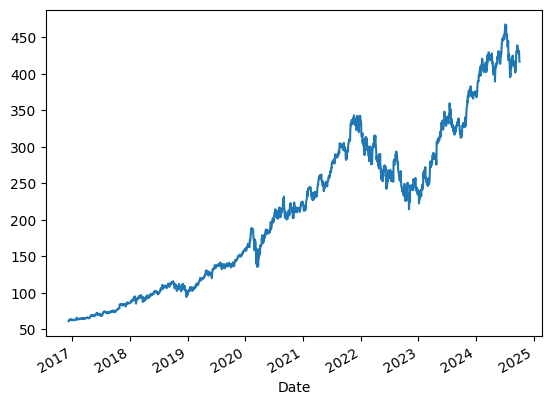

In [ ]:
df.Close.plot()